Problem statement: In order to help Unicorn Ventures in their decision, you need to forecast the traffic on JetRail for the next 7 months

In [132]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

from statsmodels.graphics.api import qqplot

In [115]:
train = pd.read_csv("https://raw.githubusercontent.com/Nikhil-V98/Analyticsvidhya/main/Time_Series_Forecasting/Train_SU63ISt.csv")
test = pd.read_csv("https://raw.githubusercontent.com/Nikhil-V98/Analyticsvidhya/main/Time_Series_Forecasting/Test_0qrQsBZ.csv")

In [116]:
test.drop('ID',axis = 1,inplace = True)
train.drop('ID',axis = 1,inplace = True)

In [117]:
train['Datetime']=pd.to_datetime(train.Datetime, format='%d-%m-%Y %H:%M')
test['Datetime']=pd.to_datetime(test.Datetime, format='%d-%m-%Y %H:%M')

In [118]:
indexedtrain = train.set_index('Datetime')

In [121]:
indexedtrain

,Count
Datetime,
2012-08-25 00:00:00,8
2012-08-25 01:00:00,2
2012-08-25 02:00:00,6
2012-08-25 03:00:00,2
2012-08-25 04:00:00,2
...,...
2014-09-25 19:00:00,868
2014-09-25 20:00:00,732
2014-09-25 21:00:00,702


In [125]:
dta =indexedtrain.resample('D').sum()

In [126]:
sm.stats.durbin_watson(dta)

array([0.07163968])

# Examine the Data

Now we take a look at the data.

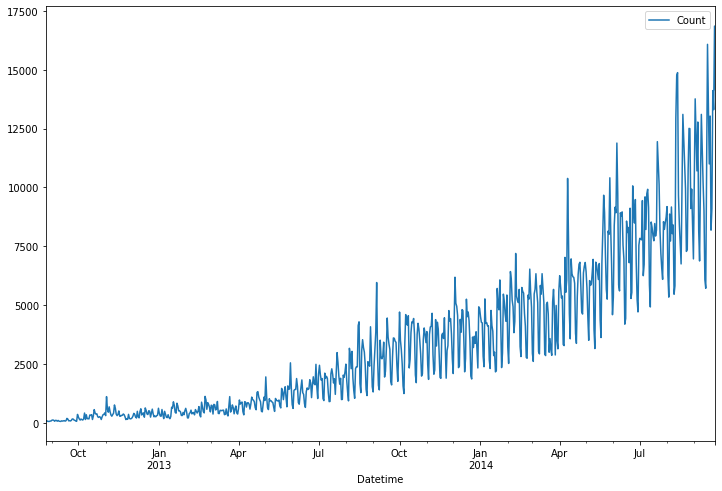

In [128]:
# show plots in the notebook
%matplotlib inline
dta.plot(figsize=(12,8));

c:\Users\Nik\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


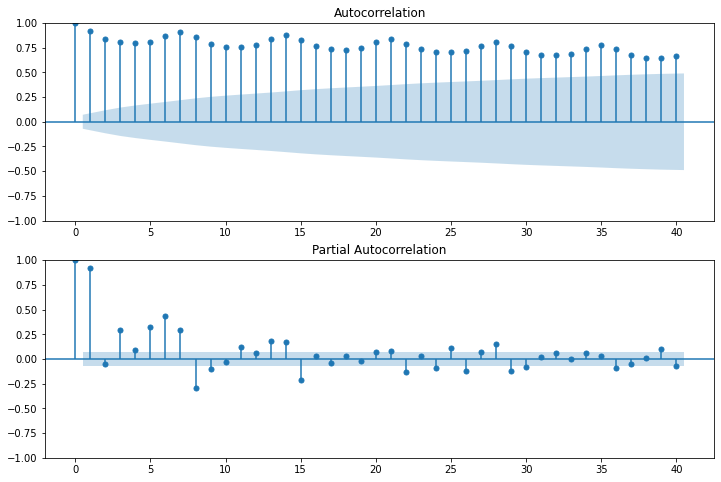

In [127]:
# show plots in the notebook
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta, lags=40, ax=ax2)

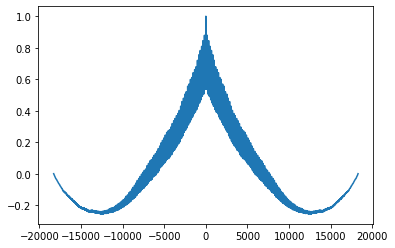

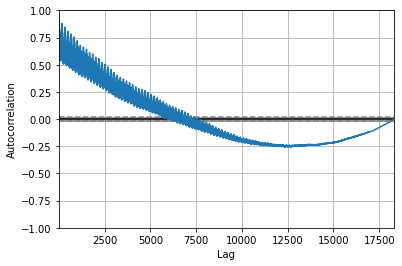

In [129]:
from pandas.plotting import autocorrelation_plot
# show plots in the notebook
%matplotlib inline
indexedtrain['Count_copy'] = indexedtrain['Count']
indexedtrain['Count_copy'] = (indexedtrain['Count_copy'] - indexedtrain['Count_copy'].mean()) / (indexedtrain['Count_copy'].std())
plt.acorr(indexedtrain['Count_copy'],maxlags = len(indexedtrain['Count_copy']) -1, linestyle = "solid", usevlines = False, marker='')
plt.show()
autocorrelation_plot(indexedtrain['Count'])
plt.show()

In [203]:
from statsmodels.tsa.arima.model import ARIMA

In [247]:
training_data=indexedtrain[0:14631]#Train period from 2016-01-01 to 2017-02-31
test_data=indexedtrain[14631:] #Month 3,4,5,6 as validtaion period